In [39]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns

# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = ""
consumer_secret = ""
access_token = ""
access_token_secret = ""

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [40]:
# Target search Term
target_terms = ("@BBC", "@CBS","@CNN", "@Fox", "@nytimes")

In [41]:
# Counter
# counter = 1

# Variables for holding sentiments
sentiments = []

In [42]:
# Loop through all target users
for target in target_terms:

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    
    counter=1
    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):
    
        # Get all tweets from home feed
        public_tweets=api.user_timeline(target, page=x)
        #public_tweets = api.search(target_terms, count=100, result_type="recent")
        # Loop through all tweets 
        for tweet in public_tweets:
            
            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweets_ago = counter
            
            # Add each value to the appropriate array
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            
            # Add sentiments for each tweet into an array
            sentiments.append({"User":target, "Text":tweet["text"], "Date":tweet["created_at"], "Compound": compound, "Positive": pos, "Negative": neg, "Neutral":neu,
                          "Tweets Ago":counter})
            
            # Add to counter 
            counter = counter + 1
            

In [43]:
# Convert sentiments to DataFrame
sentiments_pd = pd. DataFrame.from_dict(sentiments)
sentiments_pd.tail()

Compound                            Date  Negative  Neutral  Positive  \
493    0.3818  Thu Dec 28 03:10:02 +0000 2017     0.000    0.890     0.110   
494    0.0000  Thu Dec 28 02:57:31 +0000 2017     0.000    1.000     0.000   
495    0.2263  Thu Dec 28 02:50:33 +0000 2017     0.000    0.840     0.160   
496   -0.3400  Thu Dec 28 02:40:21 +0000 2017     0.167    0.833     0.000   
497    0.3818  Thu Dec 28 02:40:05 +0000 2017     0.000    0.843     0.157   

                                                  Text  Tweets Ago      User  
493  Tech companies aren’t going to protect your da...          96  @nytimes  
494  From 52 places to go to pictures from the wome...          97  @nytimes  
495  In a jab at President Trump, Gov. Cuomo pardon...          98  @nytimes  
496  RT @nytimesmusic: The pop charts were crazy th...          99  @nytimes  
497  Some hamsters and squirrels really do have a s...         100  @nytimes

In [44]:
sentiments_pd.sort_values('Tweets Ago', inplace=True)
sentiments_pd.head(10)

Compound                            Date  Negative  Neutral  Positive  \
0     -0.0772  Thu Dec 28 20:05:03 +0000 2017     0.115    0.791     0.094   
198    0.1280  Thu Dec 28 20:15:13 +0000 2017     0.158    0.647     0.194   
398    0.8070  Thu Dec 28 20:10:08 +0000 2017     0.000    0.751     0.249   
100    0.0000  Thu Dec 28 19:28:22 +0000 2017     0.000    1.000     0.000   
298    0.2960  Thu Dec 28 10:25:26 +0000 2017     0.089    0.732     0.179   
199    0.7264  Thu Dec 28 20:00:22 +0000 2017     0.000    0.644     0.356   
1      0.0000  Thu Dec 28 19:30:03 +0000 2017     0.000    1.000     0.000   
101    0.8750  Wed Dec 27 22:45:05 +0000 2017     0.000    0.643     0.357   
299    0.4215  Thu Dec 28 06:18:02 +0000 2017     0.000    0.741     0.259   
399   -0.3182  Thu Dec 28 19:55:03 +0000 2017     0.113    0.887     0.000   

                                                  Text  Tweets Ago      User  
0    The theatre shows you won’t want to miss in 20...           1      @BBC  
198  Yes or No? Simple answers to your tax question...           1      @CNN  
398  The 25 best movies of the 21st century so far ...           1  @nytimes  
100  Some of TV's biggest stars saluted @TheNormanL...           1      @CBS  
298  RT @alicegoldfuss: Two statements that are bot...           1      @Fox  
199  Foxconn got a really good deal from Wisconsin....           2      @CNN  
1    This first aid phone app is saving lives.📱🏥\n\...           2      @BBC  
101  The search is on to find the pro football play...           2      @CBS  
299  ICYMI: inclusion has to be proactive and inter...           2      @Fox  
399  The Lives They Lived: Remembering some of the ...           2  @nytimes

In [45]:
# Save the DataFrame as a csv
sentiments_pd.to_csv("News_outlet_sentiments.csv", encoding="utf-8", index=False)

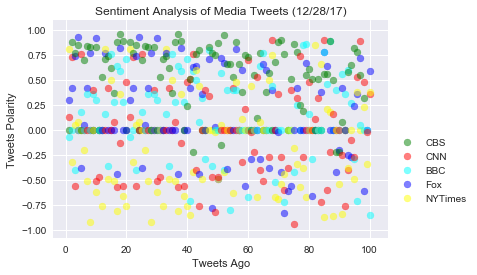

In [51]:
# Create plot
# plt.plot(sentiments_pd["Tweets Ago"], sentiments_pd["Compound"], marker="o", linewidth=0, alpha=0.5)
for index, row in sentiments_pd.iterrows():
    if row['User']== "@CBS":
        cbs=plt.scatter(row["Tweets Ago"], row["Compound"], marker="o", color="green", alpha=0.5)
    elif row['User']== "@CNN":
        cnn=plt.scatter(row["Tweets Ago"], row["Compound"], marker="o", color="red",alpha=0.5)
    elif row['User']== "@BBC":
        bbc=plt.scatter(row["Tweets Ago"], row["Compound"], marker="o", color="cyan",alpha=0.5)    
    elif row['User']== "@Fox":
        fox=plt.scatter(row["Tweets Ago"], row["Compound"], marker="o", color="blue",alpha=0.5)    
    elif row['User']== "@nytimes":
        nytimes=plt.scatter(row["Tweets Ago"], row["Compound"], marker="o", color="yellow",alpha=0.5)    
        
    
# # Incorporate the other graph properties
plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%x")))
plt.ylabel("Tweets Polarity")
plt.xlabel("Tweets Ago")
plt.legend(handles=[cbs,cnn,bbc,fox,nytimes],labels=["CBS", "CNN", "BBC", "Fox", "NYTimes"], bbox_to_anchor=(1, 0.5))
sns.set()

# Save the figure
plt.savefig("Sentiment_Analysis.png")

# Plot
plt.show()

In [47]:
#groupby_compound=sentiments_pd["Compound"].groupby(sentiments_pd["User"])
#groupby_compound.mean()

grouped=sentiments_pd.groupby('User', as_index=False)
new =grouped.aggregate(np.mean)
new.head()

User  Compound  Negative   Neutral  Positive  Tweets Ago
0      @BBC  0.127773  0.047960  0.853820  0.098200        50.5
1      @CBS  0.511610  0.008959  0.775143  0.215929        49.5
2      @CNN  0.006099  0.087430  0.827930  0.084640        50.5
3      @Fox  0.145132  0.068350  0.798820  0.132870        50.5
4  @nytimes -0.144849  0.114960  0.823910  0.061130        50.5

In [48]:
new["User"]=new["User"].replace('@BBC', 'BBC')
new["User"]=new["User"].replace('@CBS', 'CBS')
new["User"]=new["User"].replace('@CNN', 'CNN')
new["User"]=new["User"].replace('@Fox', 'Fox')
new["User"]=new["User"].replace('@nytimes', 'NYT')
new.head()

User  Compound  Negative   Neutral  Positive  Tweets Ago
0  BBC  0.127773  0.047960  0.853820  0.098200        50.5
1  CBS  0.511610  0.008959  0.775143  0.215929        49.5
2  CNN  0.006099  0.087430  0.827930  0.084640        50.5
3  Fox  0.145132  0.068350  0.798820  0.132870        50.5
4  NYT -0.144849  0.114960  0.823910  0.061130        50.5

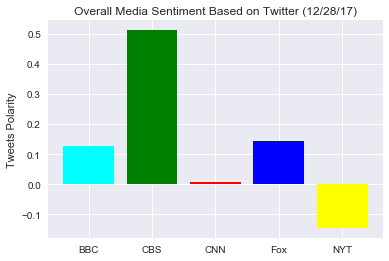

In [52]:
# Bar plot of Overall Sentiment of each news outlet
colors=["cyan", "green","red", "blue", "yellow"]

plt.bar(range(len(new)), new["Compound"], align='center', color=colors)
plt.xticks(range(len(new)), new["User"])

# # Incorporate the other graph properties
plt.title("Overall Media Sentiment Based on Twitter (%s)" % (time.strftime("%x")))
plt.ylabel("Tweets Polarity")

# Save the figure
plt.savefig("Overall_Media_Sentiment.png")

# Plot
plt.show()